In [1]:
import cv2
import numpy as np
import pandas as pd
import os
from random import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
#matplotlib inline


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from skimage import *
from sklearn.model_selection import train_test_split

IMG_SIZE = 28
NUMCLASSES = 10

trainfile = r'..\data\MNIST\train.csv'
testfile = r'..\data\MNIST\test.csv'


In [3]:
trainDF = pd.read_csv(trainfile)
testDF = pd.read_csv(testfile)

trainlabels = np.asarray(trainDF.label)
traindigits = np.asarray(trainDF)
traindigits = traindigits[:,1:]

traindigits, valdigits, trainlabels, vallabels = train_test_split(traindigits, trainlabels, test_size=0.2, random_state=42)

testdigits = np.asarray(testDF)

trainDF.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def digit(arr):
    return arr.reshape(IMG_SIZE, IMG_SIZE)

def make_labels(label):
    labels = np.zeros([NUMCLASSES],np.uint8)
    labels[label] = 1
    return labels
    
def train_data_with_label():
    train_images = []
    for i in range(traindigits.shape[0]):
        img = digit(traindigits[i,:])
        train_images.append([img, make_labels(trainlabels[i])])
    #shuffle(train_images)
    return train_images

def validation_data_with_label():
    validation_images = []
    for i in range(valdigits.shape[0]):
        img = digit(valdigits[i,:])
        validation_images.append([img, make_labels(vallabels[i])])
    #shuffle(validation_images)
    return validation_images
    

In [6]:
make_labels(7)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [7]:
training_images = train_data_with_label()
validation_images = validation_data_with_label()

print((np.array(training_images)).shape)
print((np.array(validation_images)).shape)


(33600, 2)
(8400, 2)


<ipython-input-7-45666c38a6e7>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print((np.array(training_images)).shape)
<ipython-input-7-45666c38a6e7>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print((np.array(validation_images)).shape)


In [8]:
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
tr_lbl_data = np.array([i[1] for i in training_images])
val_img_data = np.array([i[0] for i in validation_images]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
val_lbl_data = np.array([i[1] for i in validation_images])


In [9]:
model = Sequential()

model.add(InputLayer(input_shape=[IMG_SIZE,IMG_SIZE,1])) #keras will internally add batch dimension

model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))
model.add(Conv2D(filters=64,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(NUMCLASSES,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [10]:
#Training
history = model.fit(x=tr_img_data,y=tr_lbl_data,epochs=10,batch_size=700,validation_data=(val_img_data,val_lbl_data),verbose=1)
model.save_weights("mymodel.h5")

Epoch 1/10
48/48 [==============================] - 26s 548ms/step - loss: 6.3535 - accuracy: 0.2717 - val_loss: 1.4303 - val_accuracy: 0.5494
Epoch 2/10
48/48 [==============================] - 30s 627ms/step - loss: 1.2802 - accuracy: 0.5569 - val_loss: 0.4587 - val_accuracy: 0.8782
Epoch 3/10
48/48 [==============================] - 30s 615ms/step - loss: 0.7359 - accuracy: 0.7601 - val_loss: 0.2372 - val_accuracy: 0.9338
Epoch 4/10
48/48 [==============================] - 29s 594ms/step - loss: 0.4906 - accuracy: 0.8470 - val_loss: 0.1602 - val_accuracy: 0.9542
Epoch 5/10
48/48 [==============================] - 30s 622ms/step - loss: 0.3729 - accuracy: 0.8856 - val_loss: 0.1258 - val_accuracy: 0.9623
Epoch 6/10
48/48 [==============================] - 32s 663ms/step - loss: 0.3124 - accuracy: 0.9052 - val_loss: 0.1057 - val_accuracy: 0.9668
Epoch 7/10
48/48 [==============================] - 32s 668ms/step - loss: 0.2770 - accuracy: 0.9194 - val_loss: 0.0923 - val_accuracy: 0.9705

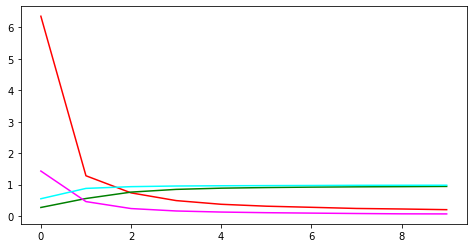

In [16]:
fig = plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_loss'],color='magenta')
plt.plot(history.history['val_accuracy'],color='cyan')
plt.show()

[[0.   0.   0.99 0.   0.   0.   0.   0.   0.   0.  ]]
[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.98]]
[[0.06 0.   0.03 0.04 0.   0.   0.   0.22 0.02 0.61]]
[[0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]]
[[0.   0.   0.   0.   0.   0.   0.   0.95 0.   0.04]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]]
[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]]
[[0.   0.   0.   0.   0.   0.99 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.   0.   0.   0.   0.99 0.   0.  ]]
[[0.   0.   0.   0.   0.55 0.01 0.   0.01 0.04 0.35]]
[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[0.   0.   0.   0.   0.99 0.   0.   0.   0.   0.  ]]
[[0.   0.   0.   0.98 0.   0.01 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]]
[[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0

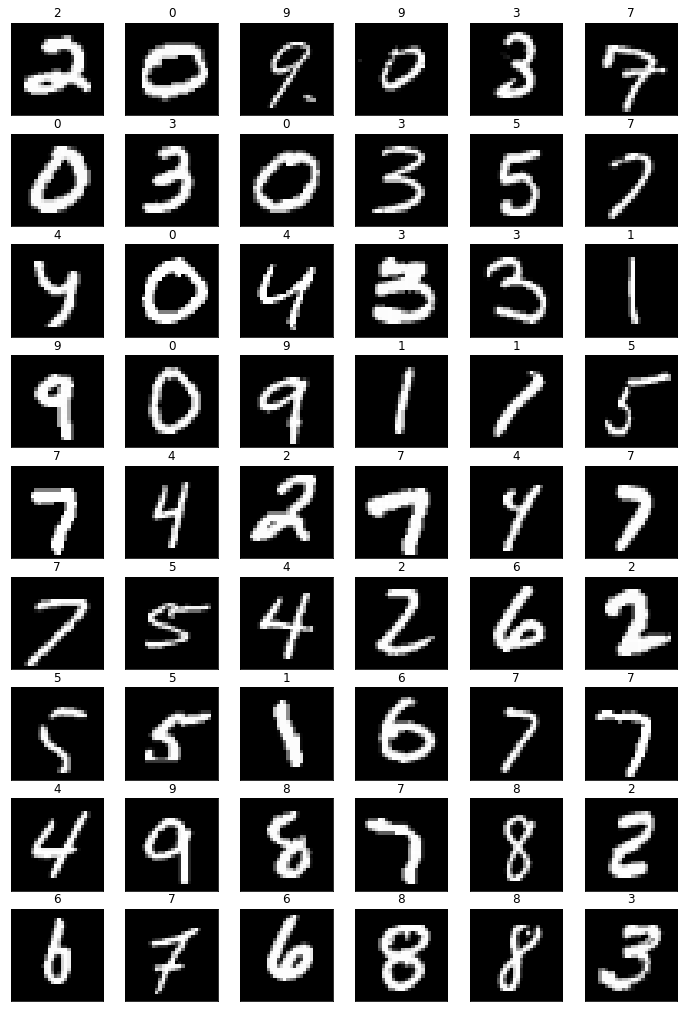

In [20]:
#Testing

fig = plt.figure(figsize=(12, 18))
for i in range(testdigits.shape[0]):
    y = fig.add_subplot(9, 6, i+1)
    img = digit(testdigits[i,:])
    img = img.reshape(1,IMG_SIZE,IMG_SIZE,1)
    model_out = model.predict(img)
    print(np.uint16(model_out*100)/100)
    str_label= str(np.argmax(model_out))
    
    y.imshow(digit(testdigits[i,:]),cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    if i==53:
        break;
plt.show()
